# Offscreen Rasterization Basics
Menpo3D wraps a subproject called [cyrasterize](https://github.com/menpo/cyrasterize) which allows for simple rasterization of 3D meshes. At the moment, only basic rendering is support, with no lighting. However, in the near future many more features will be added.

To begin, we need to import a mesh.

In [2]:
import numpy as np
import menpo3d.io as mio

mesh = mio.import_builtin_asset('james.obj')

As with all core Menpo objects, it is very simple to visualize what the textured mesh looks like. An external window will be created which shows the mesh that we just loaded (the lovely [James Booth](http://www.menpo.io/team.html#james)). This window is fully interactive and contains a number of features provided by the underlying window manager, [Mayavi](http://code.enthought.com/projects/mayavi/).

Leave this window open so that we can try and replicate it using the rasterizer!

#### Note: You must call `%matplotlib qt` before rendering any 3D meshes to prevent the notebook from crashing

In [3]:
%matplotlib qt
viewer = mesh.view()

## Fetching the viewer state
Oncr you've moved James around in to an interesting pose, you might want to take snapshot of this pose using the rasterizer! We allow you to easily access this state via a property on the viewer.

#### NOTE: You must leave the visualisation window open in order to be able to access these settings

In [4]:
viewer_settings = viewer.renderer_settings

As you can see from the output below, the `renderer_settings` property provides all the necessary state to control the camera for rasterization.

In [5]:
# Let's print the current state so that we can see it!
np.set_printoptions(linewidth=500, precision=1, suppress=True)
for k, v in viewer_settings.iteritems():
    print("{}: ".format(k))
    print(v)

projection_matrix: 
[[    2.9     0.      0.      0. ]
 [    0.      3.7     0.      0. ]
 [    0.      0.     -1.8 -1417.3]
 [    0.      0.     -1.      0. ]]
width: 
400
model_matrix: 
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]
view_matrix: 
[[  -0.7    0.7    0.   -23.8]
 [  -0.4   -0.4    0.8   37.2]
 [   0.6    0.6    0.6 -954. ]
 [   0.     0.     0.     1. ]]
height: 
315


## Building a GLRasterizer
Now that we have all the necessary state, we a able to initialize our rasterizer and produce output images. We begin by initialising a `GLRasterizer` which the necessary camera/rendering canvas state.

In [6]:
from menpo3d.rasterize import GLRasterizer

# Build a rasterizer configured from the current view
r = GLRasterizer(**viewer_settings)

We can then rasterize our mesh of James, given then camera parameters that we just initialised our rasterizer with. This will produce a single output image that should be identical (bar the background colour or any lighting settings) to the view shown in the visualisation window.

In [7]:
# Rasterize to produce an RGB image
rgb_img = r.rasterize_mesh(mesh)

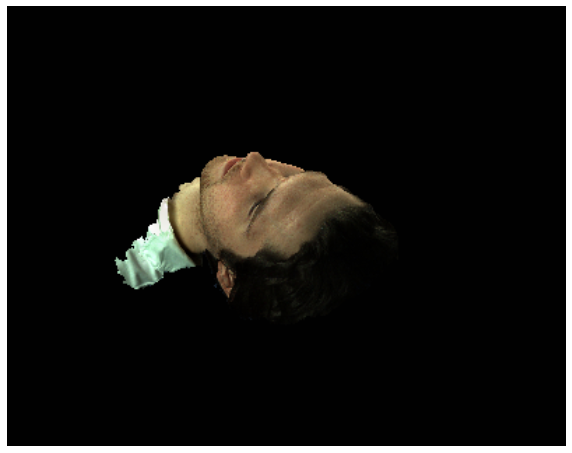

In [8]:
%matplotlib inline
rgb_img.view()

All rasterized images have their mask set to show what the rasterizer actually processed. Any black pixels were not processed by the shader.

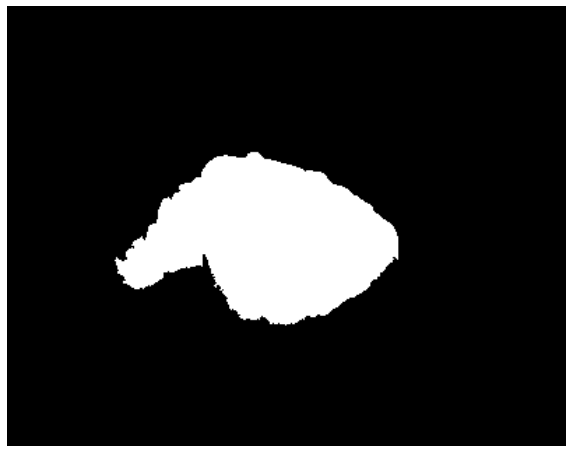

In [9]:
rgb_img.mask.view()

### Rasterisation of arbitrary floating 
`GLRasterizer` gives us the ability to rasterize arbitrary floating point information. For instance, we can render out a `XYZ` floating point shape image. This is particularly useful for simulating depth cameras such as the Microsoft Kinect. Note, however, that the depth (`z`) values returned are in world coordinates, and do not represent true distances from the 'camera'.

In [10]:
# The first output is the RGB image as before, the second is the XYZ information
rgb_img, shape_img = r.rasterize_mesh_with_shape_image(mesh)

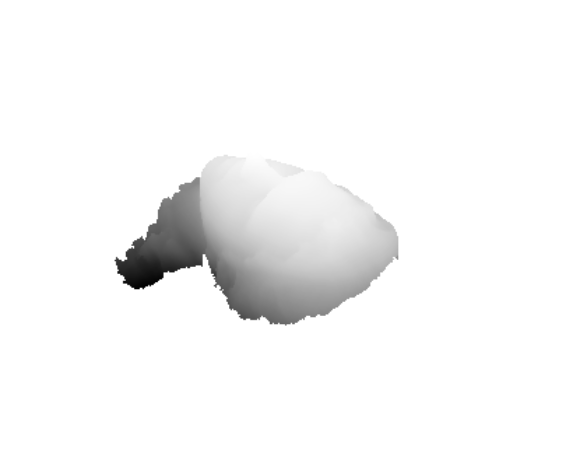

In [11]:
# The last channel is the z information in model space coordinates
# Note that this is NOT camera depth
shape_img.view(channels=2)